In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from typing import List, Tuple, Dict

In [2]:
NUM_EXAMPLES = 100
KERNEL_SIZE = 17
CENTER = KERNEL_SIZE // 2
TRAJECTORIES_DIR = 'hw1/trajectories'
PSF_DIR = 'hw1/psf'
BLURRED_DIR = 'hw1/blurred'

In [3]:
mat = loadmat('hw1/100_motion_paths.mat')
X, Y = mat['X'], mat['Y']

In [4]:
def save_trajectories(mat, output_folder: str):
    for i, (x, y) in enumerate(zip(mat['X'], mat['Y'])):
        plt.plot(x, y)
        plt.savefig(f'{output_folder}/{i}.png')
        _ = plt.clf()

In [19]:
save_trajectories(mat['X'], mat['Y'], 'hw1/trajectories')

<Figure size 640x480 with 0 Axes>

In [73]:
def generate_psf(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    psfs = np.zeros((NUM_EXAMPLES, KERNEL_SIZE, KERNEL_SIZE))
    for i in range(NUM_EXAMPLES):
        yvec = CENTER - np.round(Y[i]).astype(int)
        xvec = CENTER + np.round(X[i]).astype(int)
        for x, y in zip(xvec, yvec):
            # print(i, xi, yi)
            psfs[i, y, x] += 1
        psfs[i] = psfs[i] / np.sum(psfs[i])
    # np.apply_along_axis(lambda x: x / np.sum(x), 1, psfs)
    return psfs


In [74]:
psfs = generate_psf(X, Y)

In [ ]:
new_psfs = []
for i in range(len(psfs)):
    print(psfs[i].sum())
    new_psfs.append(psfs[i] / psfs[i].sum())

In [69]:
yvec = CENTER - np.round(Y[0]).astype(int)

In [72]:
np.unique(yvec, return_counts=True)

(array([8, 9]), array([923,  78], dtype=int64))

In [ ]:
a = np.zeros((5, 10, 10), dtype=int)
a

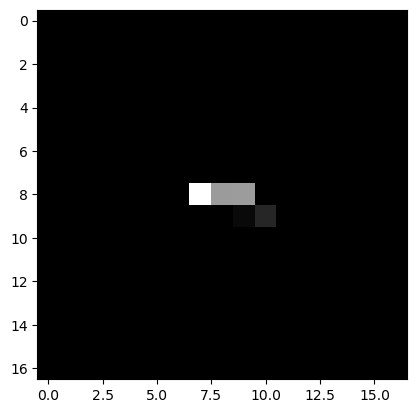

In [79]:
plt.imshow(psfs[0], cmap='gray')
